In [6]:
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
import keras
from keras.datasets import mnist 


ImportError: Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python38-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 18, in swig_import_helper
    fp, pathname, description = imp.find_module('_pywrap_tensorflow', [dirname(__file__)])
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python38-32\lib\imp.py", line 296, in find_module
    raise ImportError(_ERR_MSG.format(name), name=name)
ImportError: No module named '_pywrap_tensorflow'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python38-32\lib\site-packages\tensorflow\python\__init__.py", line 66, in <module>
    from tensorflow.python import pywrap_tensorflow
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python38-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 28, in <module>
    _pywrap_tensorflow = swig_import_helper()
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python38-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 20, in swig_import_helper
    import _pywrap_tensorflow
ModuleNotFoundError: No module named '_pywrap_tensorflow'


Failed to load the native TensorFlow runtime.

See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/g3doc/get_started/os_setup.md#import_error

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

Getting data and pre-processing it

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

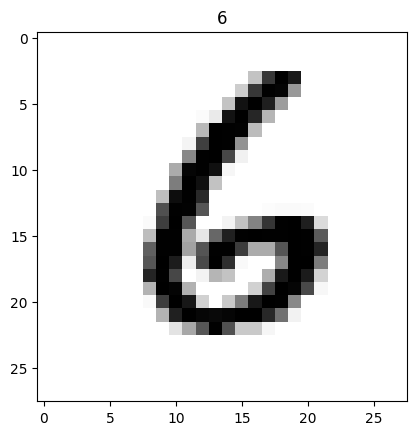

In [4]:
def plot_img(i):
  plt.imshow(X_train[i], cmap = 'binary')
  plt.title(y_train[i])
  plt.show()

plot_img(6000)

In [5]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [6]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [7]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
y_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
#cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dense(10,activation = "softmax"))

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [16]:
cnn.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy , metrics = ['accuracy'])

In [17]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_acc',min_delta=0.01, patience=4, verbose= 1)
mc = ModelCheckpoint("./bestmodel.h5",monitor="val_acc", verbose=1, save_best_only=True)
cb = [es,mc]

In [ ]:
cnn.fit(X_train, y_train, epochs = 25, validation_split=0.3)

Epoch 1/25
1313/1313 [==============================] - 35s 27ms/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.0404 - val_accuracy: 0.9894
Epoch 2/25
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0193 - accuracy: 0.9935 - val_loss: 0.0436 - val_accuracy: 0.9874
Epoch 3/25
1313/1313 [==============================] - 36s 27ms/step - loss: 0.0185 - accuracy: 0.9936 - val_loss: 0.0490 - val_accuracy: 0.9868
Epoch 4/25
1313/1313 [==============================] - 36s 27ms/step - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.0449 - val_accuracy: 0.9890
Epoch 5/25
1313/1313 [==============================] - 36s 27ms/step - loss: 0.0158 - accuracy: 0.9942 - val_loss: 0.0421 - val_accuracy: 0.9892
Epoch 6/25
1313/1313 [==============================] - 36s 27ms/step - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.0433 - val_accuracy: 0.9894
Epoch 7/25
1313/1313 [==============================] - 36s 27ms/step - loss: 0.0138 - accuracy: 0.9951 - val_loss: 0.0397 -

In [ ]:
y_pred = cnn.predict(X_test)
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# accuracy_score(y_test, y_pred)

313/313 [==============================] - 2s 8ms/step


In [ ]:
cnn.evaluate(y_test, y_pred)

InvalidArgumentError: ignored